In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# load the annotation
annot_dict = np.load('rat7m_train_test_annotation.pkl', allow_pickle=True)

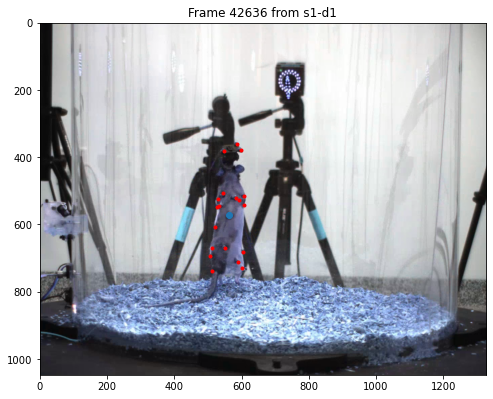

In [5]:
# visualize a random 2D rat pose
camname = 'Camera1'
random_idx = np.random.randint(0, len(annot_dict['table']['subject_idx']), 1)[0]

plt.figure(figsize=(8, 8))
img = cv2.imread(annot_dict['table']['image_path'][camname][random_idx])
plt.imshow(img)
pose_2d = annot_dict['table']['2D_keypoints'][camname][random_idx]
com = annot_dict['table']['2D_com'][camname][random_idx]

for pts in pose_2d:
    plt.scatter(pts[0], pts[1], marker='.', color='r')
plt.scatter(com[0], com[1])
plt.title('Frame {} from s{}-d{}'.format(annot_dict['table']['frame_idx'][camname][random_idx], 
                                         int(annot_dict['table']['subject_idx'][random_idx]), 
                                         int(annot_dict['table']['day_idx'][random_idx])))
plt.show()